# Numpy Review

In [0]:
import numpy as np

X = np.random.random((10,3))

Xmean = X.mean(0)
Xcentered = X - Xmean

In [3]:
print(X, Xmean)
print(Xcentered.mean(0))

[[0.60532867 0.32755158 0.41456345]
 [0.11957619 0.76512093 0.7937453 ]
 [0.16042137 0.53256282 0.61149448]
 [0.48017521 0.31930411 0.87642182]
 [0.59725496 0.44684048 0.65893525]
 [0.08218709 0.88286606 0.41709774]
 [0.26147505 0.11350281 0.34363623]
 [0.54637532 0.27829477 0.5181535 ]
 [0.14514897 0.41190923 0.71925574]
 [0.91342307 0.53841478 0.11979254]] [0.39113659 0.46163676 0.54730961]
[ 2.22044605e-17  2.22044605e-17 -3.33066907e-17]


In [0]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:,np.newaxis]  

z = np.sin(x)**10 + np.cos(10+ y*x)* np.cos(x)

In [0]:
a = np.linspace(0, 5)

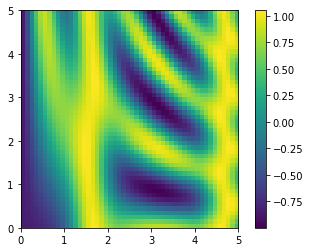

In [6]:
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0,5,0,5], cmap='viridis')
plt.colorbar()

In [7]:
# Summer days mask (June 21st is the 172 day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print(summer)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [8]:
x1 = np.arange(12).reshape((3,4))
print (x1)

print (x1[ [0,1,2],[2,1,3] ] )
print (x1[ 1, [3,2,1,0] ] )
print( x1[1:, [3,2,1,0]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 2  5 11]
[7 6 5 4]
[[ 7  6  5  4]
 [11 10  9  8]]


# Ch.4 Visualization
## Quick review - Using Seaborn

In [9]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [10]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');


Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn. As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling Seaborn's *set()* method. By convention, Seaborn is imported as *sns*:


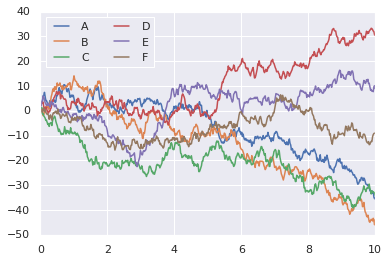

In [11]:
import seaborn as sns
sns.set()
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Exploring Seaborn Plots

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables. We have seen that this is relatively straightforward in Matplotlib:


In [12]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with *sns.kdeplot*:

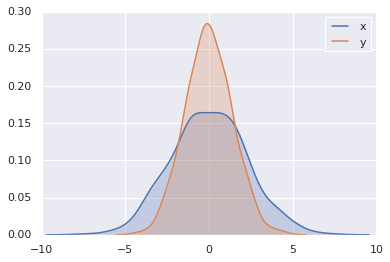

In [13]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using *distplot* :

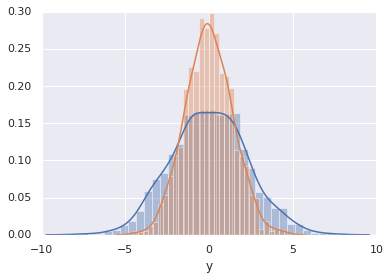

In [14]:
sns.distplot(data['x'])
sns.distplot(data['y']);

If we pass the full two-dimensional dataset to kdeplot, we will get a two-dimensional visualization of the data:
Passing a single df is deperected, need to pass the two columns

In [15]:
sns.kdeplot(data["x"], data['y']);

We can see the joint distribution and the marginal distributions together using sns.jointplot. For this plot, we'll set the style to a white background:

In [16]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

There are other parameters that can be passed to jointplot—for example, we can use a hexagonally based histogram instead:

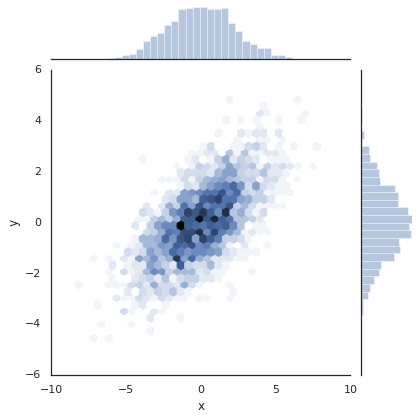

In [17]:
with sns.axes_style('white'):
   sns.jointplot("x", "y", data, kind='hex')


Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:


In [18]:
# Load iris
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Visualizing the multidimensional relationships among the samples is as easy as calling sns.pairplot:

In [19]:
sns.pairplot(iris, hue='species', height=2.5);

Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's FacetGrid makes this extremely simple. We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [20]:
# Load Data 
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [21]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

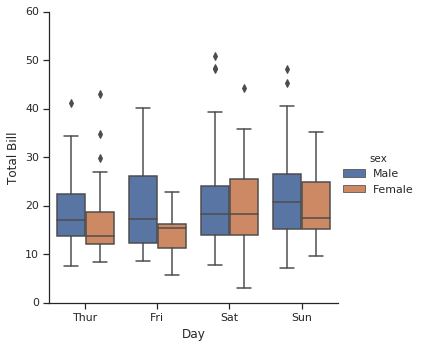

In [22]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

Joint distributions

Similar to the pairplot we saw earlier, we can use sns.jointplot to show the joint distribution between different datasets, along with the associated marginal distributions:


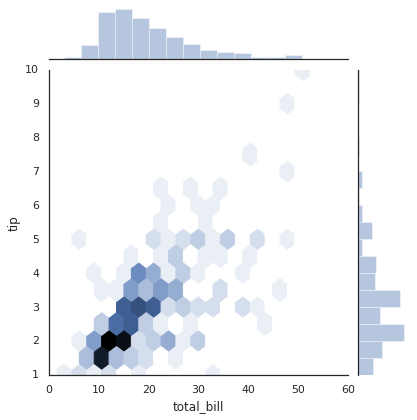

In [23]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

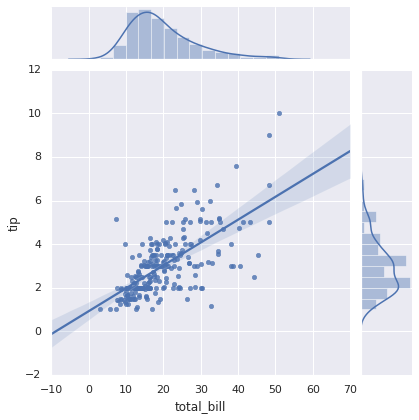

In [24]:
# The joint plot can even do some automatic kernel density estimation and regression:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

Bar plots

Time series can be plotted using sns.factorplot. In the following example, we'll use the Planets data that we first saw in Aggregation and Grouping:


In [25]:
# Load data
planets = sns.load_dataset('planets')
planets.head()

with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the method of discovery of each of these planets:


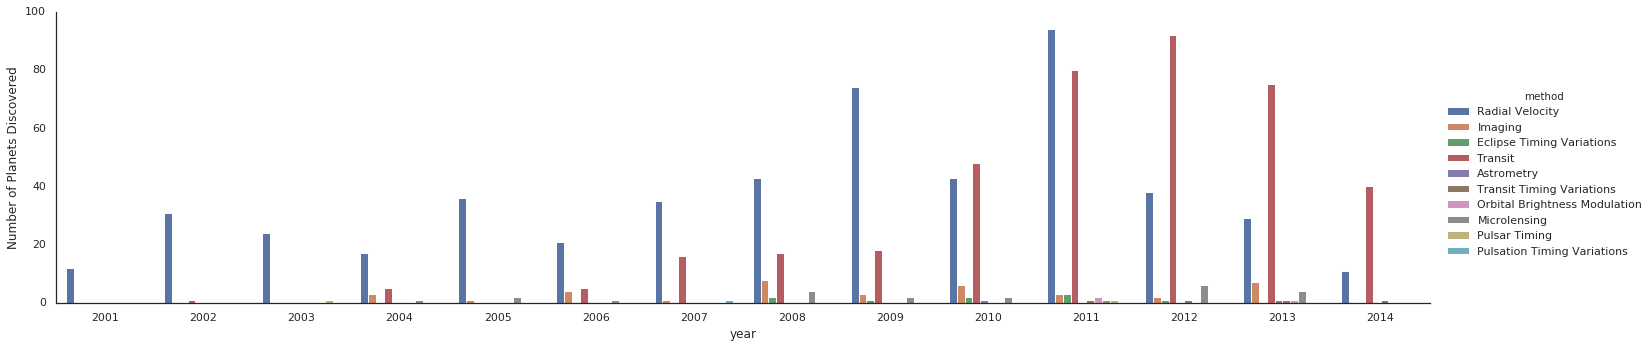

In [26]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Example: Exploring Marathon Finishing Times

Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon. I've scraped the data from sources on the Web, aggregated it and removed any identifying information, and put it on GitHub where it can be downloaded (if you are interested in using Python for web scraping, I would recommend Web Scraping with Python by Ryan Mitchell). We will start by downloading the data from the Web, and loading it into Pandas:


In [27]:
# Importing datetime 
import datetime as dt

# Getting the data
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return dt.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})

print(data.head(5), data.dtypes)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0  3637k      0 --:--:-- --:--:-- --:--:-- 3622k
   age gender    split    final
0   33      M 01:05:38 02:08:51
1   32      M 01:06:26 02:09:28
2   31      M 01:06:49 02:10:42
3   38      M 01:06:16 02:13:45
4   31      M 01:06:32 02:13:59 age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object


In [28]:
#For the purpose of our Seaborn plotting utilities, let's next add columns that give the times in seconds:

data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

age gender    split    final  split_sec  final_sec
0   33      M 01:05:38 02:08:51     3938.0     7731.0
1   32      M 01:06:26 02:09:28     3986.0     7768.0
2   31      M 01:06:49 02:10:42     4009.0     7842.0
3   38      M 01:06:16 02:13:45     3976.0     8025.0
4   31      M 01:06:32 02:13:59     3992.0     8039.0

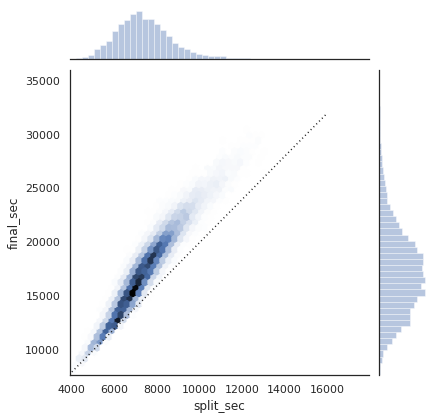

In [29]:
# To get an idea of what the data looks like, we can plot a jointplot over the data:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

In [30]:
from scipy import stats
# To get an idea of what the data looks like, we can plot a jointplot over the data:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')
    g.annotate(stats.pearsonr)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon. If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:


In [31]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

age gender    split    final  split_sec  final_sec  split_frac
0   33      M 01:05:38 02:08:51     3938.0     7731.0   -0.018756
1   32      M 01:06:26 02:09:28     3986.0     7768.0   -0.026262
2   31      M 01:06:49 02:10:42     4009.0     7842.0   -0.022443
3   38      M 01:06:16 02:13:45     3976.0     8025.0    0.009097
4   31      M 01:06:32 02:13:59     3992.0     8039.0    0.006842

In [32]:
data.sort_values('final_sec', ascending=True).head(10)

age gender    split    final  split_sec  final_sec  split_frac
0   33      M 01:05:38 02:08:51     3938.0     7731.0   -0.018756
1   32      M 01:06:26 02:09:28     3986.0     7768.0   -0.026262
2   31      M 01:06:49 02:10:42     4009.0     7842.0   -0.022443
3   38      M 01:06:16 02:13:45     3976.0     8025.0    0.009097
4   31      M 01:06:32 02:13:59     3992.0     8039.0    0.006842
5   31      M 01:06:13 02:14:11     3973.0     8051.0    0.013042
6   27      M 01:06:40 02:14:28     4000.0     8068.0    0.008428
7   31      M 01:06:31 02:15:16     3991.0     8116.0    0.016511
8   30      M 01:05:39 02:15:57     3939.0     8157.0    0.034204
9   30      M 01:05:40 02:16:39     3940.0     8199.0    0.038907

Where this split difference is less than zero, the person negative-split the race by that fraction. Let's do a distribution plot of this split fraction:




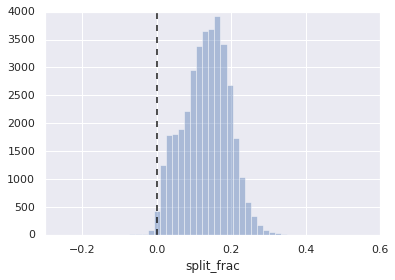

In [33]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [34]:
sum(data.split_frac < 0)

251

Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a pairgrid, which draws plots of all these correlations:


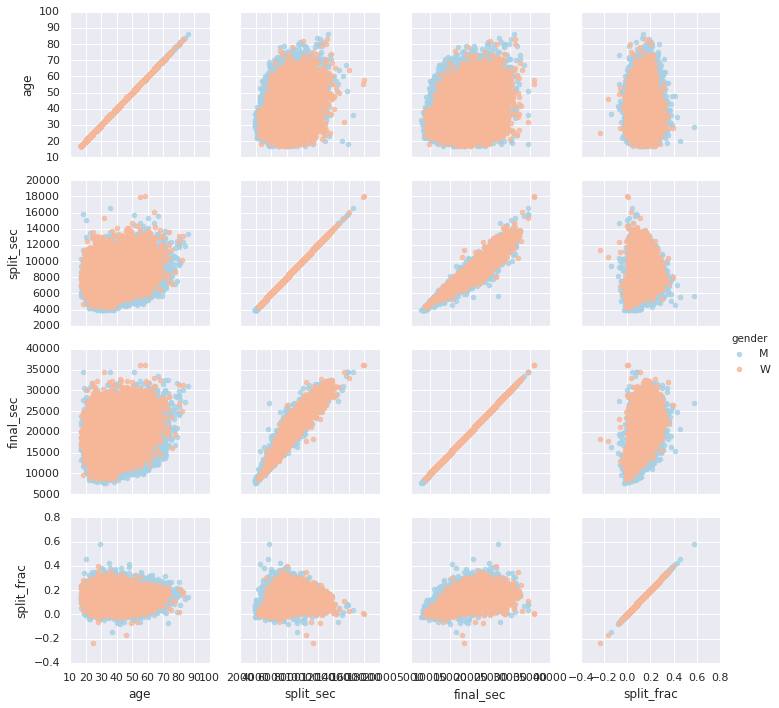

In [35]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();



It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time. (We see here that Seaborn is no panacea for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap. Because the output is a simple Matplotlib plot, however, the methods in Customizing Ticks can be used to adjust such things if desired.)

The difference between men and women here is interesting. Let's look at the histogram of split fractions for these two groups:


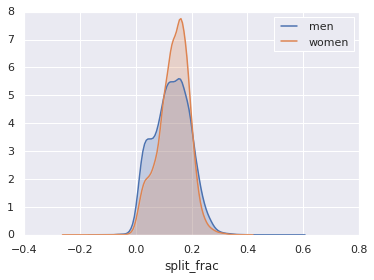

In [36]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');



The interesting thing here is that there are many more men than women who are running close to an even split! This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a violin plot




In [37]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);




This is yet another way to compare the distributions between men and women.

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:




In [38]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()


age gender    split    final  split_sec  final_sec  split_frac  age_dec
0   33      M 01:05:38 02:08:51     3938.0     7731.0   -0.018756       30
1   32      M 01:06:26 02:09:28     3986.0     7768.0   -0.026262       30
2   31      M 01:06:49 02:10:42     4009.0     7842.0   -0.022443       30
3   38      M 01:06:16 02:13:45     3976.0     8025.0    0.009097       30
4   31      M 01:06:32 02:13:59     3992.0     8039.0    0.006842       30

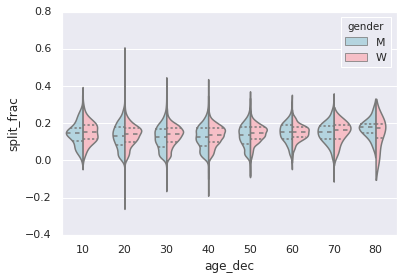

In [39]:
# men = (data.gender == 'M')
# women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);



Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform everyone in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range:



In [40]:
(data.age > 80).sum()

7



Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use regplot, which will automatically fit a linear regression to the data:





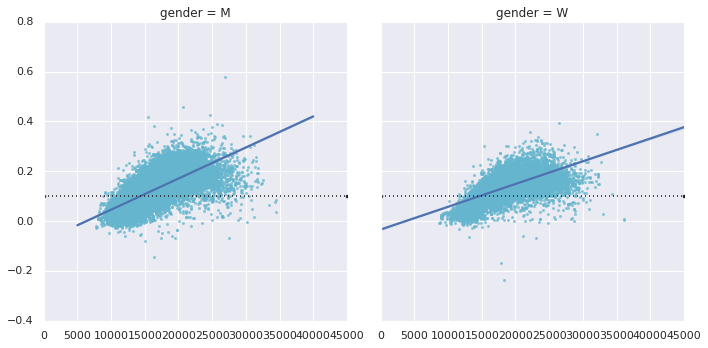

In [41]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. 

People slower than that are much less likely to have a fast second split.

# Ch5. Machine Learning

Machine Learning involves building mathematical models to help understand data. "Learning" enters the fray when we give these models tunable parameters that can be adapted to observed data; in this way the program can be considered to be "learning" from the data. Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data. 

I'll leave to the reader the more philosophical digression regarding the extent to which this type of mathematical, model-based "learning" is similar to the "learning" exhibited by the human brain.


## Categories of Machine Learning
At the most fundamental level, machine learning can be categorized into two main types: supervised learning and unsupervised learning.

***Supervised learning*** involves somehow modeling the relationship between measured features of data and some label associated with the data; once this model is determined, it can be used to apply labels to new, unknown data. This is further subdivided into classification tasks and regression tasks: in classification, the labels are discrete categories, while in regression, the labels are continuous quantities. We will see examples of both types of supervised learning in the following section.

***Unsupervised learning*** involves modeling the features of a dataset without reference to any label, and is often described as "letting the dataset speak for itself." These models include tasks such as clustering and dimensionality reduction. Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for more succinct representations of the data. We will see examples of both types of unsupervised learning in the following section.

In addition, there are so-called ***semi-supervised*** learning methods, which falls somewhere between supervised learning and unsupervised learning. Semi-supervised learning methods are often useful when only incomplete labels are available.

## Qualitative Examples of Machine Learning Applications

Code Prepration

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')
    

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

### Classification: Predicting discrete labels

[-1, 4, -2, 7]

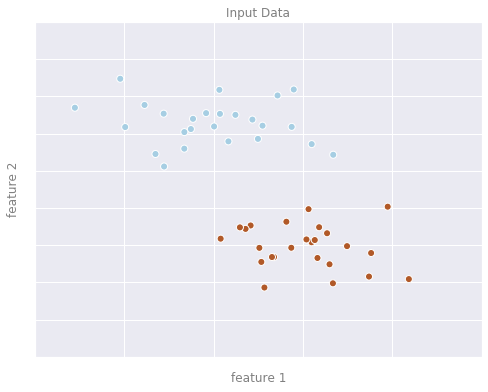

In [43]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])

The following figure shows a visual representation of what the trained model looks like for this data:

[-1, 4, -2, 7]

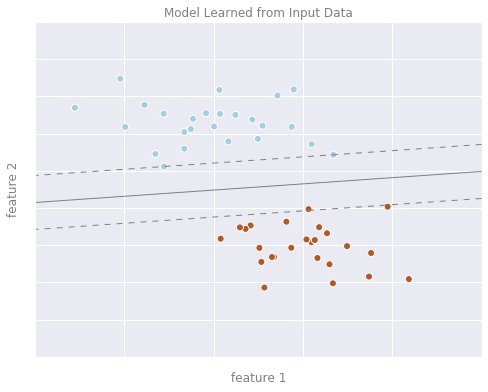

In [44]:
# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

# format plot
format_plot(ax, 'Model Learned from Input Data')
ax.axis([-1, 4, -2, 7])

**Regression Example Figures**

[-4, 4, -3, 3]

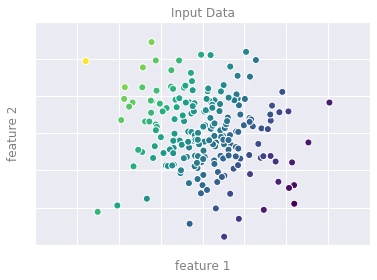

In [45]:
# Data 
from sklearn.linear_model import LinearRegression

# Create some data for the regression
rng = np.random.RandomState(1)

X = rng.randn(200, 2)
y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0])

# fit the regression model
model = LinearRegression()
model.fit(X, y)

# create some new points to predict
X2 = rng.randn(100, 2)

# predict the labels
y2 = model.predict(X2)

# plot data points
fig, ax = plt.subplots()
points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                    cmap='viridis')

# format plot
format_plot(ax, 'Input Data')
ax.axis([-4, 4, -3, 3])

Regression Example Figure 2

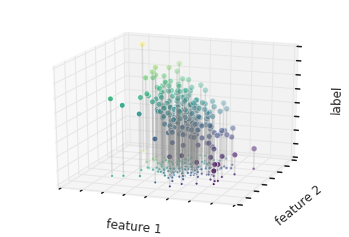

In [46]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

points = np.hstack([X, y[:, None]]).reshape(-1, 1, 3)
segments = np.hstack([points, points])
segments[:, 0, 2] = -8

# plot points in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, s=35,
           cmap='viridis')
ax.add_collection3d(Line3DCollection(segments, colors='gray', alpha=0.2))
ax.scatter(X[:, 0], X[:, 1], -8 + np.zeros(X.shape[0]), c=y, s=10,
           cmap='viridis')

# format plot
ax.patch.set_facecolor('white')
ax.view_init(elev=20, azim=-70)
ax.set_zlim3d(-8, 8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())
ax.set(xlabel='feature 1', ylabel='feature 2', zlabel='label')

# Hide axes (is there a better way?)
ax.w_xaxis.line.set_visible(False)
ax.w_yaxis.line.set_visible(False)
ax.w_zaxis.line.set_visible(False)
for tick in ax.w_xaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_yaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_zaxis.get_ticklines():
    tick.set_visible(False)

Regression Example 3

[-4, 4, -3, 3]

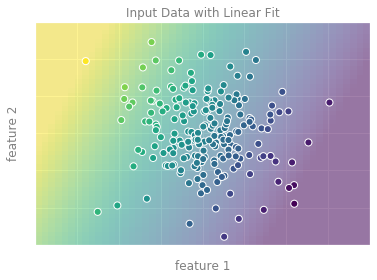

In [47]:
from matplotlib.collections import LineCollection

# plot data points
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                 cmap='viridis', zorder=2)

# compute and plot model color mesh
xx, yy = np.meshgrid(np.linspace(-4, 4),
                     np.linspace(-3, 3))
Xfit = np.vstack([xx.ravel(), yy.ravel()]).T
yfit = model.predict(Xfit)
zz = yfit.reshape(xx.shape)
ax.pcolorfast([-4, 4], [-3, 3], zz, alpha=0.5,
              cmap='viridis', norm=pts.norm, zorder=1)

# format plot
format_plot(ax, 'Input Data with Linear Fit')
ax.axis([-4, 4, -3, 3])

**Regression Example Fig4**

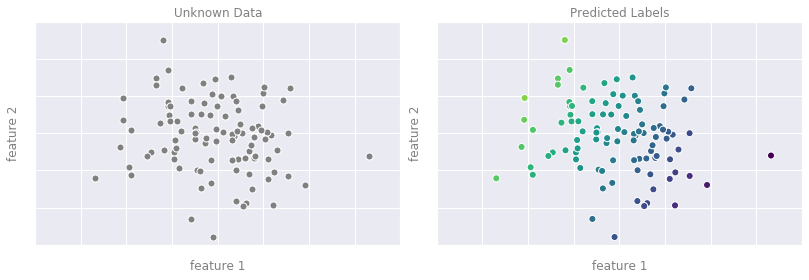

In [48]:
# plot the model fit
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', s=50)
ax[0].axis([-4, 4, -3, 3])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, s=50,
              cmap='viridis', norm=pts.norm)
ax[1].axis([-4, 4, -3, 3])

# format plots
format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')


### Clustering Examples

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

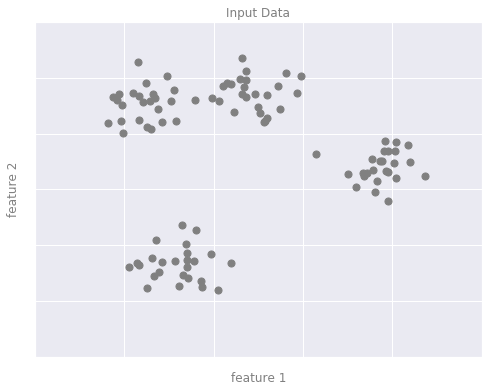

In [62]:
## Clustering Example 1

# Plot the input data
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Input Data')

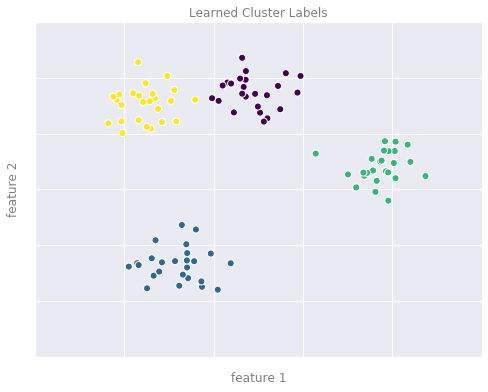

In [67]:
## Clustering Example 2
# plot the data with cluster labels
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')

# format the plot
format_plot(ax, 'Learned Cluster Labels')

**Dimensionality Reduction Example Figures**

In [68]:
## Example 1
from sklearn.datasets import make_swiss_roll

# make data
X, y = make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]

# visualize data
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='gray', s=30)

# format the plot
format_plot(ax, 'Input Data')

In [69]:
## Dimensionality Reduction Example Figure 2
from sklearn.manifold import Isomap

model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()

# visualize data
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y_fit, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax)

# format the plot
format_plot(ax, 'Learned Latent Parameter')
cb.set_ticks([])
cb.set_label('Latent Variable', color='gray')
